## Supervised Learning


Decision Tree Results:
Accuracy: 0.9415
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion Matrix:
[[ 60   3]
 [  7 101]]

Support Vector Machine Results:
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
[[ 61   2]
 [  2 106]]

Logistic Regression Results:
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

  

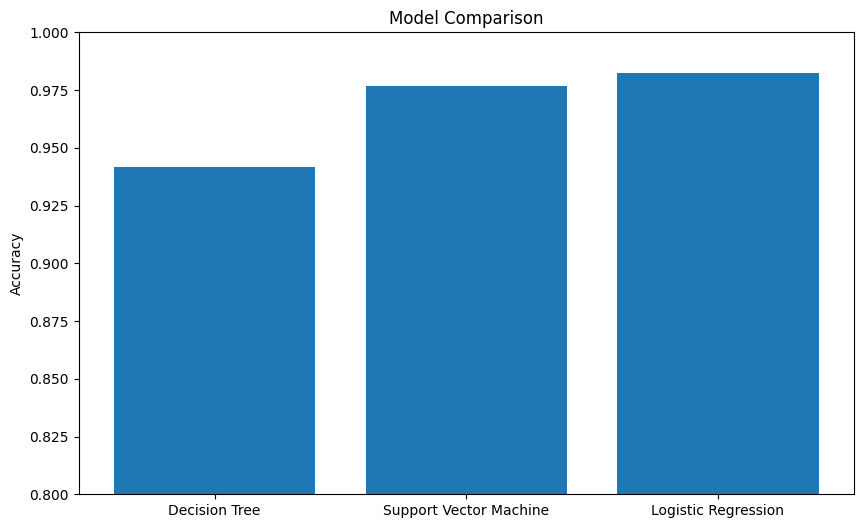

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and prepare the breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train different classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare model accuracies
accuracies = [results[name]["accuracy"] for name in models.keys()]
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.show()